#  Project: Apple Stock Price Prediction for Next 30 Days

#Goal:
- Forecast the next 30 days of Apple (AAPL) stock prices using historical stock market data (2012–2019).

# STEP 1: Problem Statement & Business Understanding
- Forecast Apple's stock closing prices.

- Help investors and analysts make informed decisions.

- Build a predictive system with real-time capability (Streamlit app).

# STEP 2: Data Collection
- Source: AAPL.csv (Daily data from 2012 to 2019)

- Columns: Date, Open, High, Low, Close, Adj Close, Volume


# STEP 3: Data Preprocessing

In [8]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# STEP 2: LOAD DATA
df = pd.read_csv('AAPL .csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date')

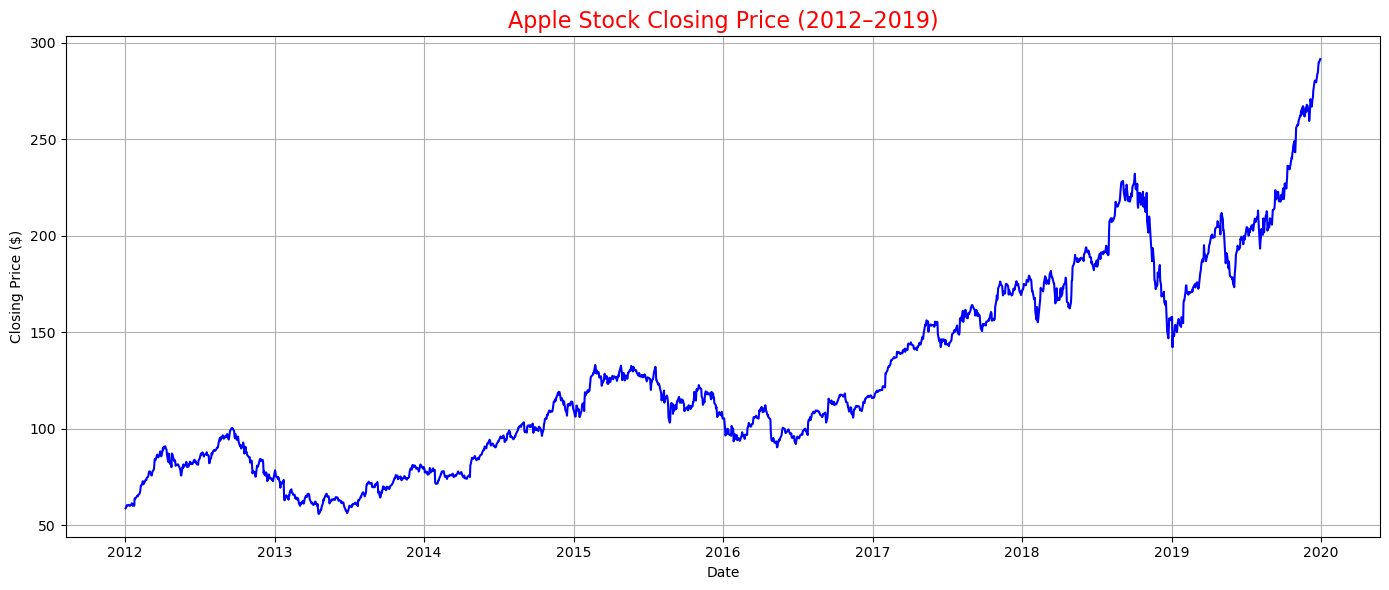

In [18]:
# STEP 3: EDA - PLOT CLOSING PRICE
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Apple Stock Closing Price (2012–2019)', fontsize=16, color ="red")
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# STEP 4: FEATURE ENGINEERING
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility_7'] = df['Close'].rolling(window=7).std()

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,Volatility_7
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,268.701334,2.576166
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,269.436999,2.091410
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,270.368667,3.824892
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,271.212999,4.533700
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,272.175665,4.910280


# Step 5A: Modeling with ARIMA (Auto Regressive Integrated Moving Average)

In [23]:
# Install required library
!pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable


In [24]:
# Reinstall libraries to fix version conflicts
!pip install numpy==1.26.4 pandas==2.2.2 --force-reinstall
!pip install pmdarima statsmodels scikit-learn matplotlib --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.3.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached statsmodels-0.14.5-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached cython-3.1.2-cp312-cp312-win_amd64.whl.metadata (6.0 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lifelines 0.29.0 requires numpy<2.0,>=1.14.0, but you have numpy 2.3.1 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.3.1 which is incompatible.
p

In [25]:
# Import libraries
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [27]:
# Use only 'Close' price for ARIMA
ts_data = df[['Date', 'Close']].set_index('Date')

In [28]:
# Auto ARIMA to find best parameters
model_auto = auto_arima(ts_data, seasonal=False, trace=True, suppress_warnings=True)
model_auto.summary()

C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' wa

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8741.963, Time=0.14 sec


C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8743.709, Time=0.46 sec


C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8743.679, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8745.913, Time=0.11 sec


C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\prasu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8743.547, Time=2.47 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 12.167 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2011
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4368.981
Date:                Sat, 12 Jul 2025   AIC                           8741.963
Time:                        20:26:47   BIC                           8753.175
Sample:                             0   HQIC                          8746.078
                               - 2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1158      0.048      2.413      0.016       0.022       0.210
sigma2         4.5239      0.070     64.796      0.000       4.387       4.661
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              3663.83
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               5.21   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Fit ARIMA model with best parameters
best_order = model_auto.order
model = ARIMA(ts_data, order=best_order)
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(ts_data.index[-1], periods=30+1, inclusive='right')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


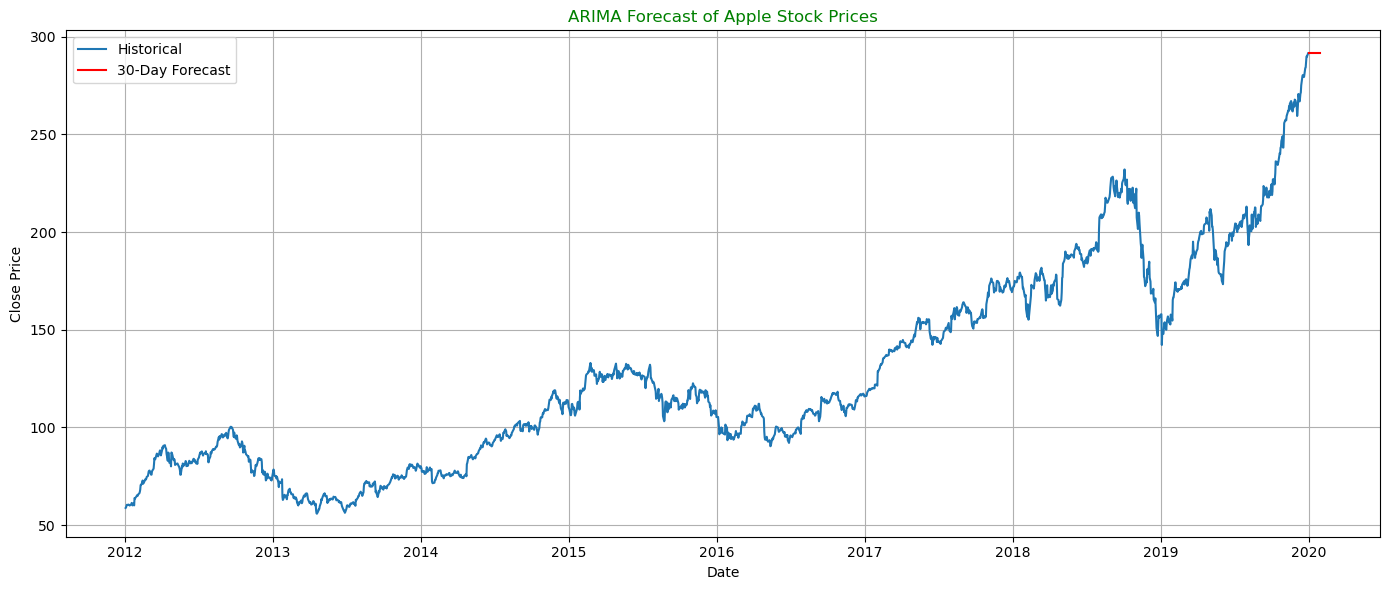

In [31]:
# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(ts_data, label='Historical')
plt.plot(forecast_dates, forecast, color='red', label='30-Day Forecast')
plt.title('ARIMA Forecast of Apple Stock Prices', color ="green")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5B: Modeling with XGBoost (Supervised Learning)

In [11]:
# Install xgboost if not installed
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 2.7 MB/s eta 0:00:56
   ---------------------------------------- 1.3/149.9 MB 2.9 MB/s eta 0:00:52
    --------------------------------------- 2.1/149.9 MB 3.2 MB/s eta 0:00:47
    --------------------------------------- 2.9/149.9 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 3.9/149.9 MB 3.5 MB/s eta 0:00:42
   - -------------------------------------- 5.0/149.9 MB 3.9 MB/s eta 0:00:38
   - -------------------------------------- 6.3/149.9 MB 4.1 MB/s eta 0:00:35
   -- ------------------------------------- 7.6/149.9 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 8.9/149.9 MB 4.7 MB/s eta 0:00:30
   -- ------------------------------------- 10.5/149.9 MB 5.0 MB/s eta 0:00:29
   --- ------------------------------------ 12.1/149.9 MB 5.2 MB/s eta 0:00:2

In [12]:
# Shift target column by -30 days
df['Target_30'] = df['Close'].shift(-30)

# Drop NA rows from shifting
data = df.dropna()

In [13]:
# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30', 'Volatility_7']
X = data[features]
y = data['Target_30']

In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [15]:
# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
# Predict
y_pred = xgb_model.predict(X_test)

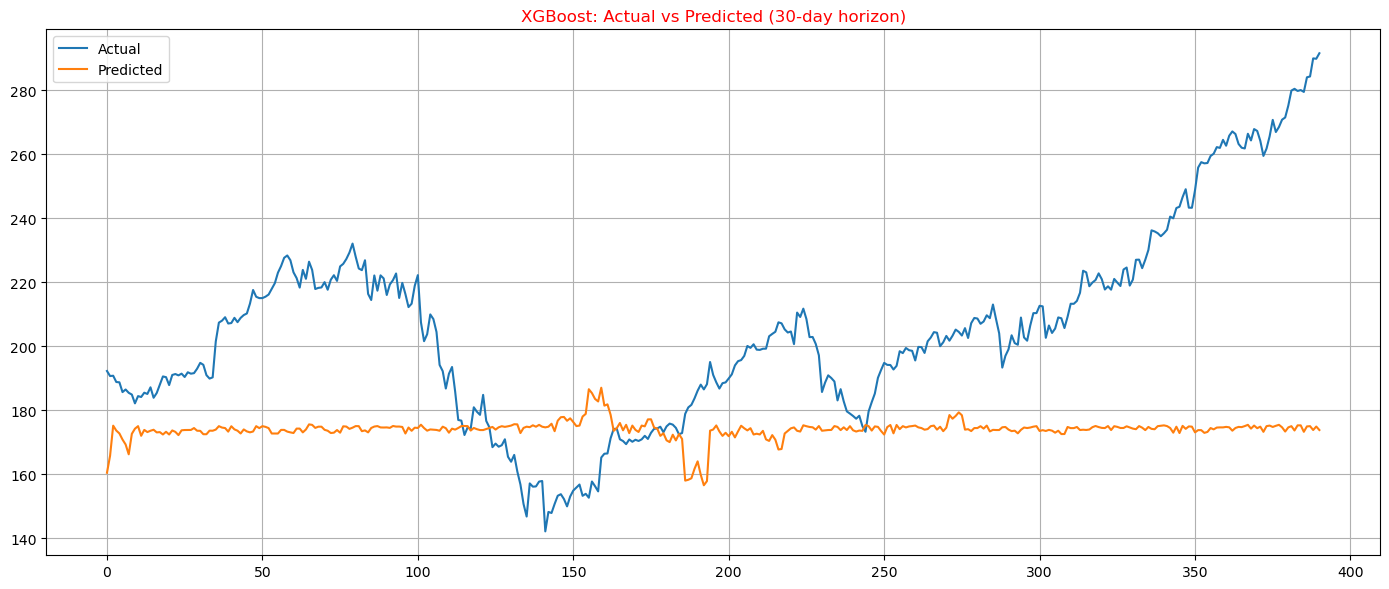

In [17]:
# Plot prediction vs actual
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost: Actual vs Predicted (30-day horizon)', color="red")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Exporting model for deployment:

In [16]:
import pickle

In [18]:
!pip install streamlit --quiet
!pip install joblib --quiet

# saving model
file_feature_scaler = "feature_scaler.pkl"
scaler = "target_scaler.pkl"
model = "model_lr.pkl"
pickle.dump(file_feature_scaler,open(file_feature_scaler,'wb'))
pickle.dump(file_target_scaler,open(file_target_scaler,'wb'))
joblib.dump(model, "stock_price_model.pkl")
joblib.dump(scaler, "target_scaler.pkl")  # if you're using a scaler like MinMaxScaler or StandardScaler

['target_scaler.pkl']